In [78]:
import os
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from random import randint

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
def model_predict(x, load_model_dir, diseases):
    for i in range(len(diseases)):
      model = load_model((load_model_dir + diseases[i] + '_model'))
      y = model.predict(x)[0]
      print(y)
      if y > 0.5:
        print(diseases[i] + ' 결과: 양성')
      else:
        print(diseases[i] + ' 결과: 음성')

In [99]:
work_dir = "/content/drive/MyDrive/고양이 안구 질환 데이터/"
load_model_dir = work_dir + 'model/'
# diseases = ["안검염", "비궤양성각막염", "결막염", "각막부골편", "각막궤양"]
diseases = ["결막염", "각막부골편", "비궤양성각막염"]

각막부골편_2.jpg


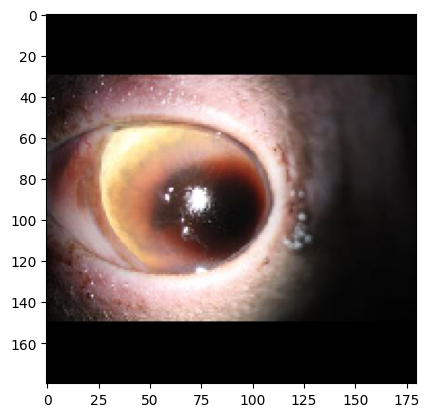

1/1 [==============================] - 0s 143ms/step
[0.7600126]
결막염 결과: 양성
1/1 [==============================] - 0s 148ms/step
[0.55370355]
각막부골편 결과: 양성
1/1 [==============================] - 0s 140ms/step
[0.51623863]
비궤양성각막염 결과: 양성


In [109]:
dir_list = os.listdir(work_dir + 'Test/')
m = randint(0, len(dir_list))
img_name = dir_list[m]
img_path = work_dir + 'Test/' + img_name

img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
x = np.expand_dims(img_array, axis=0)

print(img_name)

plt.imshow(img_array.astype('uint8'))
plt.show()

model_predict(x, load_model_dir, diseases)